# <center> Unsupervised Learning: Clustering</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [3]:
from sklearn.datasets.samples_generator import make_blobs

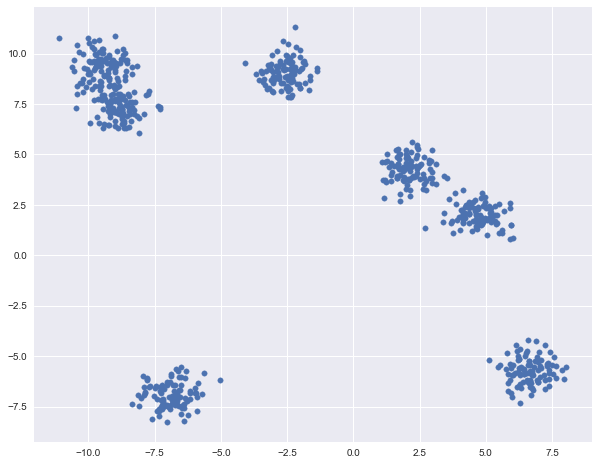

In [137]:
X, y = make_blobs(n_samples=700 ,centers =7, cluster_std=0.6 ,random_state=42)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],s=30) ##actual data no need for y 'cuz it is unsupervised learning

In [44]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
np.set_printoptions(precision=4, suppress=True)

In [49]:
dist = linkage(X,'ward')


## Dendrogram

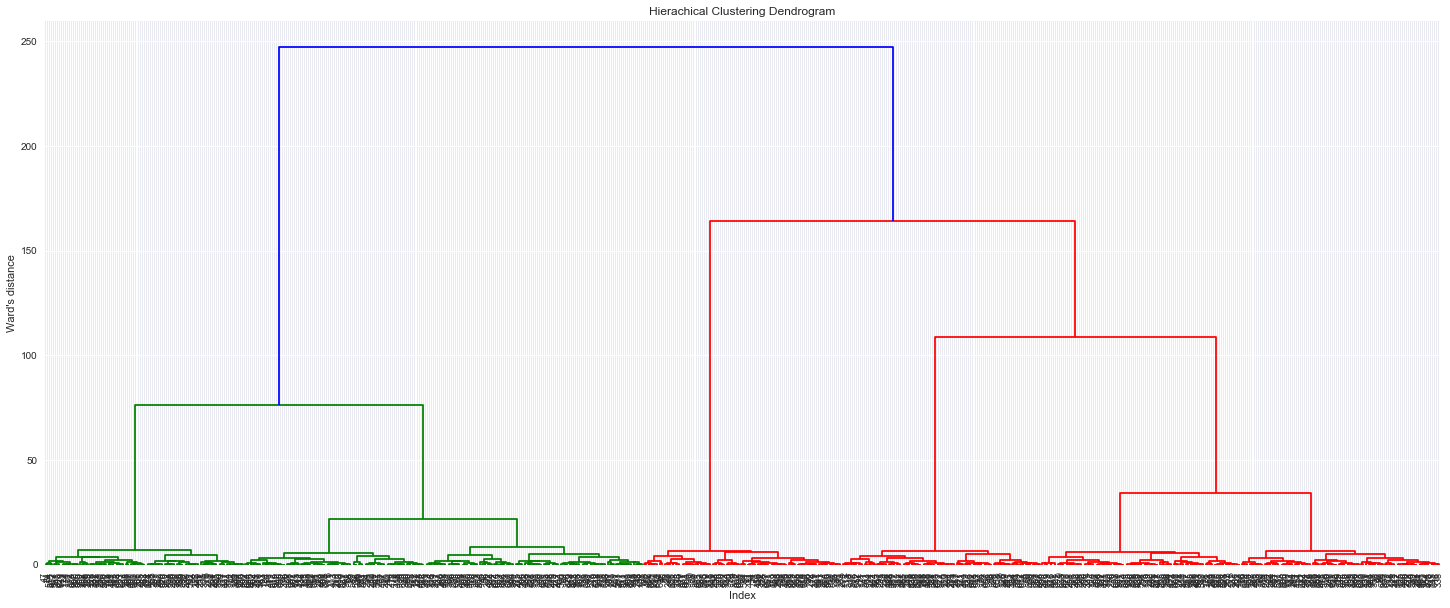

In [63]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(dist,
           leaf_rotation=90.,
           leaf_font_size=9.,);

***
### Truncating

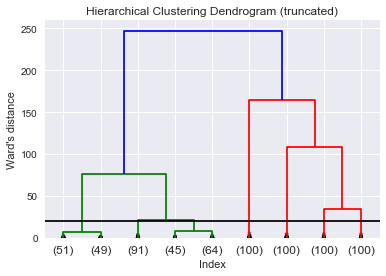

In [69]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Index')
plt.ylabel("Ward's distance")
plt.axhline(20, c='k')
dendrogram(dist, truncate_mode='lastp',
           p=9, leaf_rotation=0., leaf_font_size=12.,
           show_contracted=True);

truncating by dist

In [135]:
from scipy.cluster.hierarchy import fcluster
max_d = 20
clusters = fcluster(Z=dist, t=max_d, criterion='distance')
clusters

array([4, 2, 5, 5, 4, 1, 2, 6, 6, 6, 5, 4, 2, 4, 5, 1, 7, 6, 2, 5, 7, 7,
       7, 4, 2, 7, 4, 5, 2, 2, 7, 5, 1, 1, 4, 3, 3, 5, 4, 3, 4, 3, 3, 5,
       6, 3, 3, 1, 1, 2, 4, 1, 2, 5, 4, 5, 3, 2, 4, 4, 5, 4, 4, 5, 3, 5,
       7, 3, 2, 1, 6, 4, 7, 5, 4, 6, 4, 1, 2, 6, 7, 2, 7, 4, 1, 4, 7, 7,
       4, 2, 4, 2, 2, 7, 2, 2, 3, 5, 6, 3, 7, 3, 6, 2, 3, 4, 1, 3, 3, 1,
       5, 2, 2, 1, 3, 5, 5, 6, 4, 3, 7, 5, 1, 2, 2, 7, 5, 1, 5, 7, 6, 5,
       2, 2, 1, 7, 3, 7, 1, 7, 3, 2, 1, 4, 7, 7, 3, 7, 7, 6, 2, 7, 7, 2,
       6, 1, 4, 2, 1, 4, 1, 1, 6, 2, 7, 6, 7, 4, 2, 6, 3, 5, 1, 4, 1, 6,
       7, 3, 6, 4, 6, 6, 1, 4, 5, 4, 4, 3, 5, 4, 4, 3, 7, 3, 5, 6, 1, 4,
       7, 3, 4, 2, 2, 7, 5, 2, 6, 6, 5, 6, 2, 4, 1, 3, 2, 5, 6, 4, 7, 1,
       6, 7, 2, 2, 5, 5, 3, 7, 6, 5, 1, 1, 6, 5, 7, 6, 1, 3, 7, 4, 7, 5,
       7, 3, 7, 3, 3, 5, 5, 3, 4, 1, 5, 1, 1, 1, 6, 5, 6, 3, 3, 1, 1, 6,
       7, 5, 7, 3, 6, 5, 4, 5, 4, 5, 3, 3, 6, 4, 6, 3, 6, 2, 5, 5, 7, 1,
       2, 5, 4, 2, 4, 6, 2, 3, 4, 6, 7, 3, 1, 7, 1,

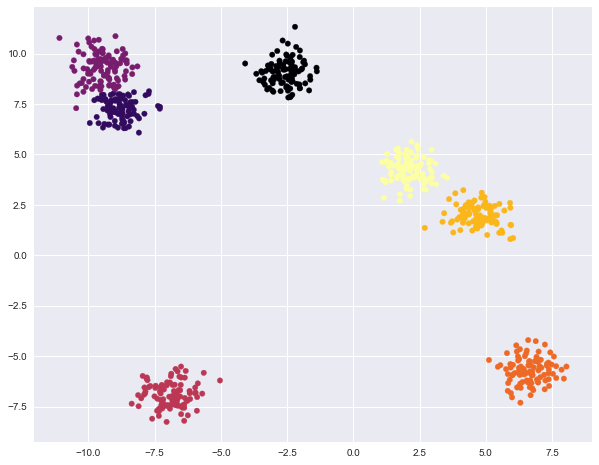

In [136]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, s=30,cmap='inferno')

truncating by clusters

In [122]:
no_of_clusturs = 6
clusters = fcluster(Z=dist, t=no_of_clusturs, criterion='maxclust')

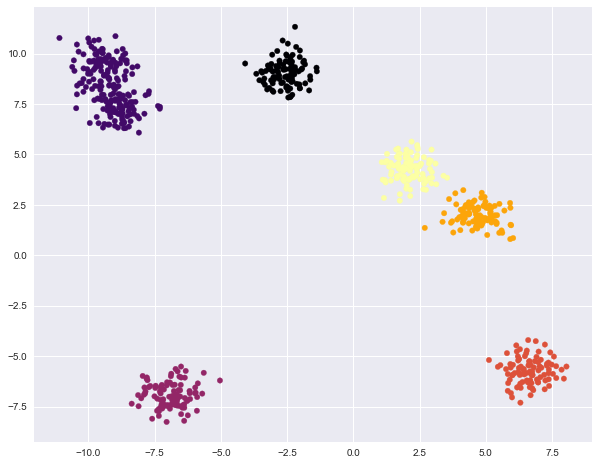

In [134]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, s=30 ,cmap='inferno');

***
Find the no of clusters

## k-Means Clustering

In [124]:
from sklearn.cluster import KMeans

In [125]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [126]:
y_kmeans = kmeans.predict(X)

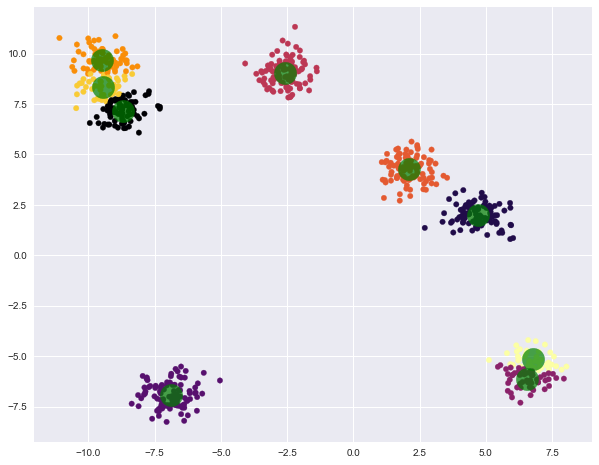

In [138]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='inferno')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green', s=500, alpha=0.7);

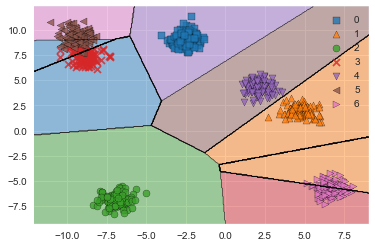

In [139]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=kmeans);

## Elbow Meathod

In [141]:
kmeans.inertia_

416.07092480850883

In [165]:
sse_ = []
for k in range(1,13):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, kmeans.inertia_])

In [166]:
sse_

[[1, 54203.23819190006],
 [2, 23632.739777398077],
 [3, 10139.805182954202],
 [4, 4227.9062071621365],
 [5, 1310.5082988949105],
 [6, 715.4348782920035],
 [7, 475.97557908366036],
 [8, 440.31942453923546],
 [9, 415.16268176015456],
 [10, 389.229182441974],
 [11, 364.495299284333],
 [12, 345.3154651105102]]

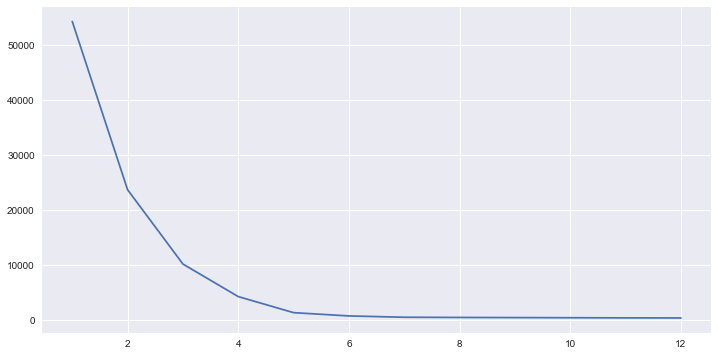

In [167]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Silhouette Analysis

In [168]:
from sklearn.metrics import silhouette_score

In [174]:
sse_ = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])

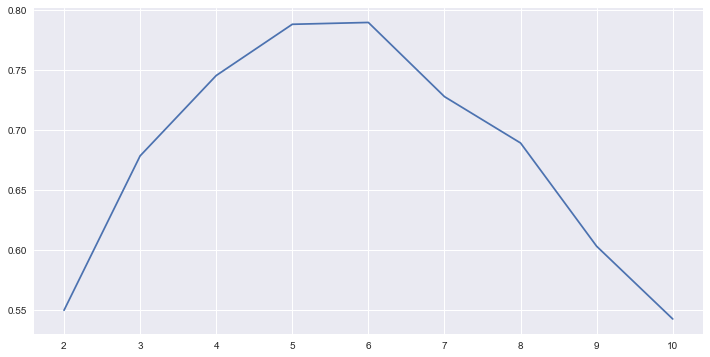

In [176]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Mean Shift

In [178]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [179]:
from itertools import cycle

In [180]:
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

In [181]:
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=1.2350598340378254, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=None, seeds=None)

In [182]:
cluster_centers = meanshift_model.cluster_centers_

In [183]:
print('\nCenters of clusters: \n', cluster_centers)


Centers of clusters: 
 [[-9.4119  9.2642]
 [-2.596   8.9599]
 [-8.8858  7.3524]
 [ 2.0699  4.3227]
 [ 6.6508 -5.7372]
 [ 4.6869  1.9899]
 [-6.8613 -7.0016]]


In [184]:
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print('\nNumber of clusters in input data =', num_clusters)


Number of clusters in input data = 7


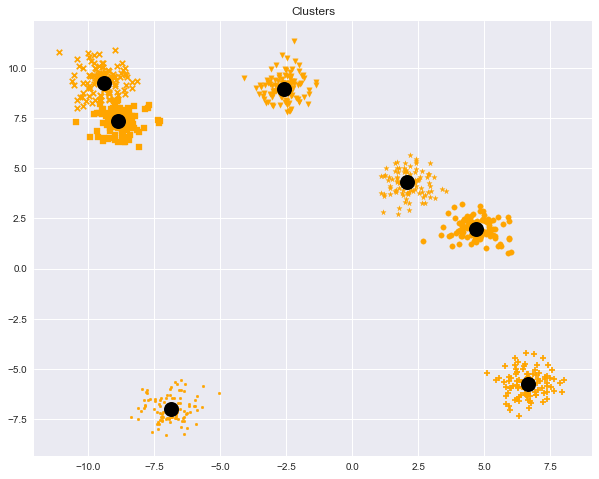

In [214]:
plt.figure(figsize=(10,8))
markers = 'xvs*+o.'
for i, marker in zip(range(num_clusters), markers):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, s=30, color='orange')
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o',  
             markerfacecolor='black', markeredgecolor='black',  
             markersize=15) 
plt.title('Clusters');

***